<a href="https://colab.research.google.com/github/harkpun/Bike-Sharing-Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* #### Date : year-month-day
* #### Rented Bike count - Count of bikes rented at each hour
* #### Hour - Hour of he day
* #### Temperature-Temperature in Celsius
* #### Humidity - %
* #### Windspeed - m/s
* #### Visibility - 10m
* #### Dew point temperature - Celsius
* #### Solar radiation - MJ/m2
* #### Rainfall - mm
* #### Snowfall - cm
* #### Seasons - Winter, Spring, Summer, Autumn
* #### Holiday - Holiday/No holiday
* #### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Regression/SeoulBikeData.csv', encoding= 'unicode_escape')
df.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3949  14/05/2018               1051    13             21.8           59   
1158  18/01/2018                107     6              2.2           82   
2628  20/03/2018                522    12              9.0           33   
3737  05/05/2018               2014    17             23.6           29   
6006  08/08/2018                614     6             27.6           84   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
3949               1.9               404                       13.4   
1158               2.0               211                       -0.5   
2628               3.1              1985                       -6.4   
3737               3.9              1948                        4.5   
6006               1.2              1123                       24.6   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3949                     2.74           0.0            0.0  Spring   
1158                     0.00           0.0            0.0  Winter   
2628                     2.59           0.0            0.0  Spring   
3737                     1.68           0.0            0.0  Spring   
6006                     0.01           0.0            0.0  Summer   

         Holiday Functioning Day  
3949  No Holiday             Yes  
1158  No Holiday             Yes  
2628  No Holiday             Yes  
3737  No Holiday             Yes  
6006  No Holiday             Yes

In [135]:
df.shape

(8760, 14)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [137]:
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [138]:
df.describe(include='object')

Date Seasons     Holiday Functioning Day
count         8760    8760        8760            8760
unique         365       4           2               2
top     01/12/2017  Spring  No Holiday             Yes
freq            24    2208        8328            8465

In [139]:
df.duplicated().sum()

0

In [140]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [141]:
df.Date = pd.to_datetime(df.Date)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()

df.drop('Date', axis=1, inplace=True)

In [142]:
# data conversion

def hour(x):
    ''' converting hours into session like mornig, Noon, Night etc.
        transforming data numeric to category. 
    '''
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make category
df['Session'] = df['Hour'].apply(hour)

# droping columns from dataset
df.drop('Hour', axis=1, inplace=True)

In [143]:
# function to get information about data_type, null_count, unique_count in thr dataframe format

def printinfo():
    temp = pd.DataFrame(index=df.columns)
    temp['data_type'] = df.dtypes
    temp['null_count'] = df.isnull().sum()
    temp['unique_count'] = df.nunique()
    return temp

printinfo()

data_type  null_count  unique_count
Rented Bike Count             int64           0          2166
Temperature(°C)             float64           0           546
Humidity(%)                   int64           0            90
Wind speed (m/s)            float64           0            65
Visibility (10m)              int64           0          1789
Dew point temperature(°C)   float64           0           556
Solar Radiation (MJ/m2)     float64           0           345
Rainfall(mm)                float64           0            61
Snowfall (cm)               float64           0            51
Seasons                      object           0             4
Holiday                      object           0             2
Functioning Day              object           0             2
Day                           int64           0            31
Month                         int64           0            12
Year                          int64           0             2
Weekday                      object           0             7
Session                      object           0             6

In [144]:
#sepreting numerical and categorical data

numeric_features = df.describe().columns
category_features = df.describe(include='object').columns

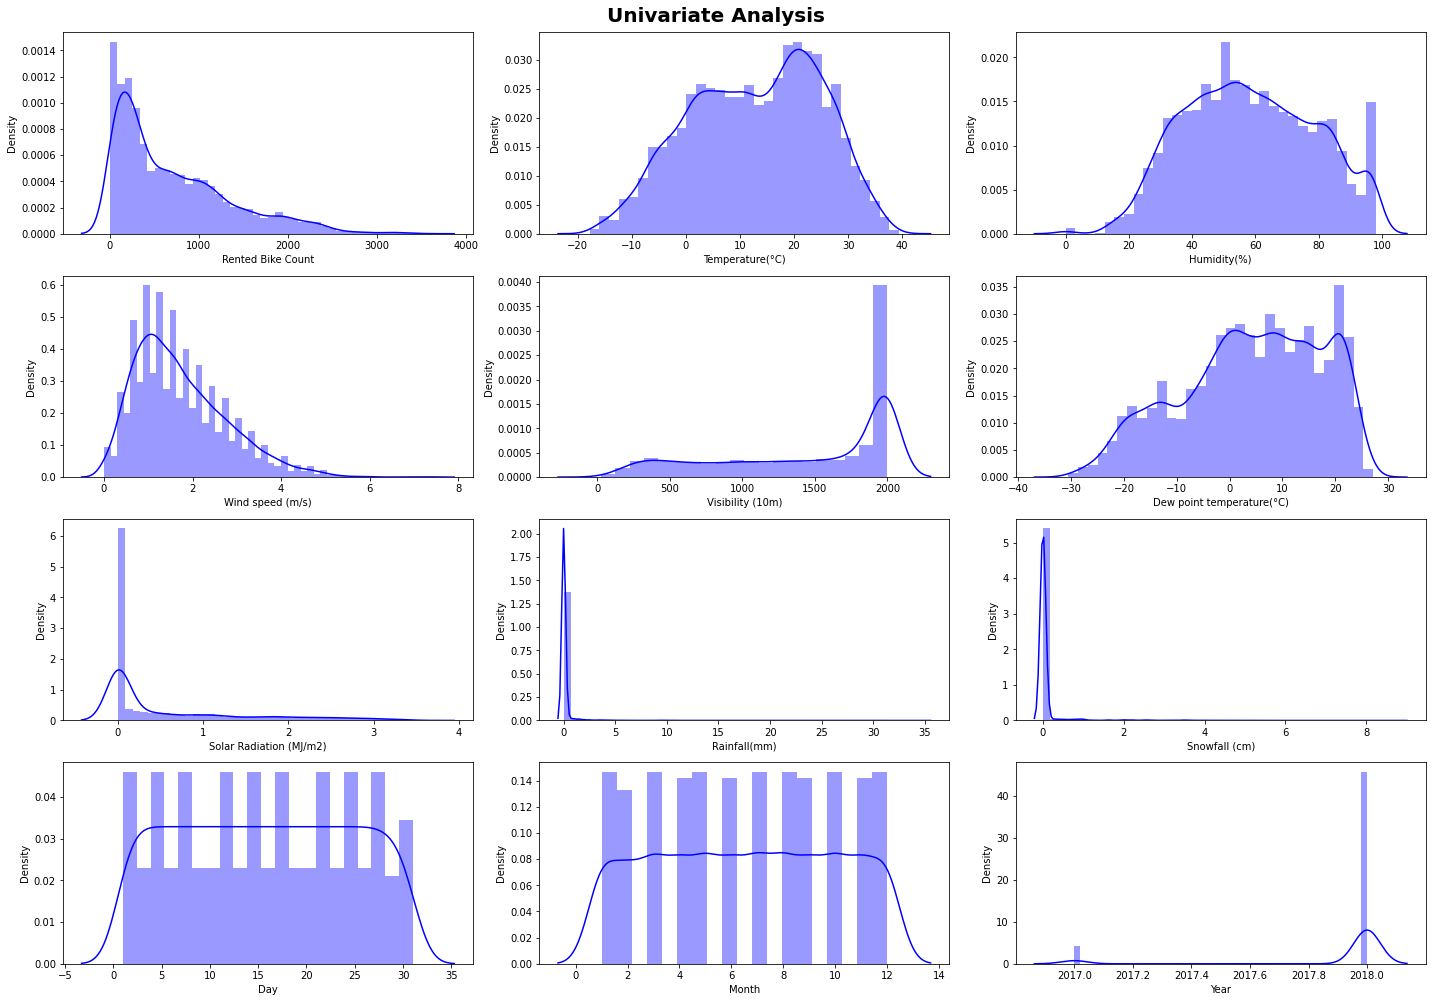

In [145]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.distplot(x=df[numeric_features[i]], kde=True, color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

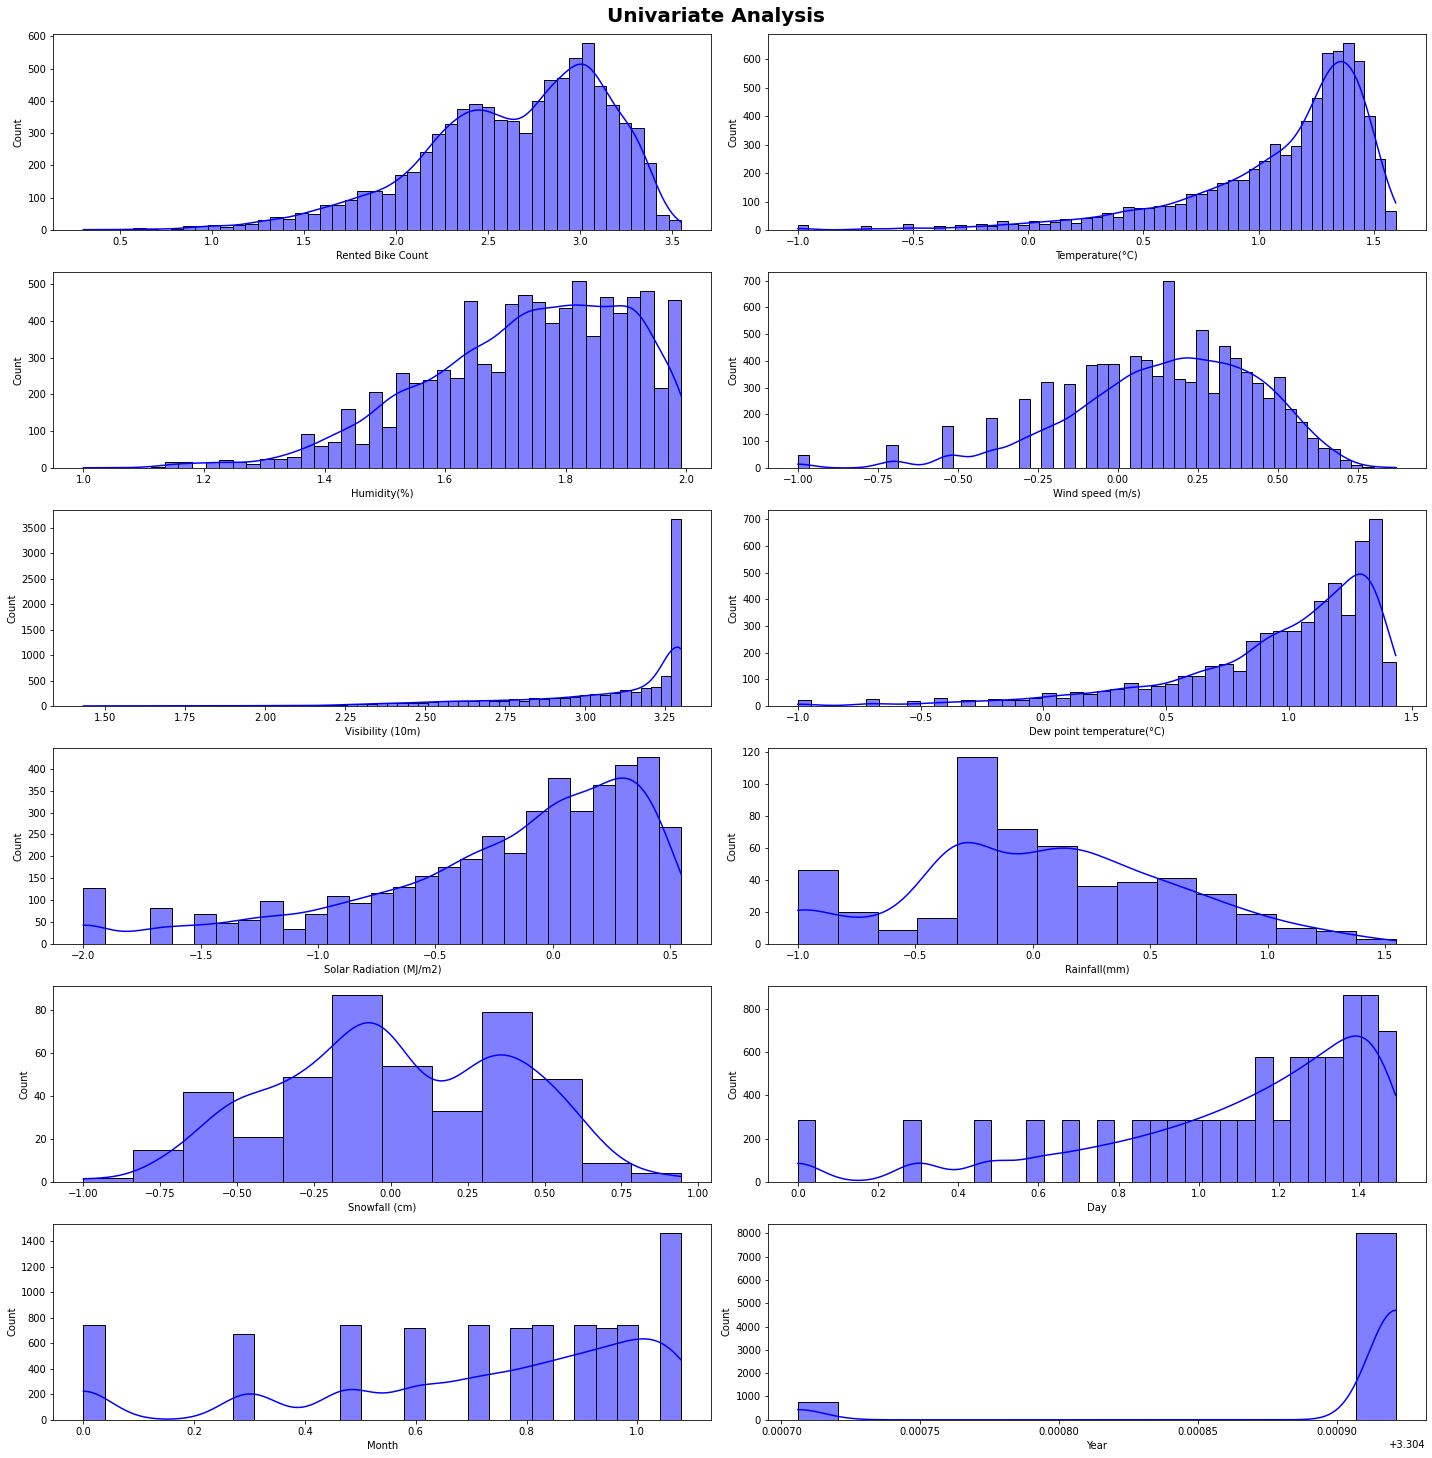

In [146]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 2, i+1)
    sns.histplot(x=np.log10(df[numeric_features[i]]), kde=True, color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

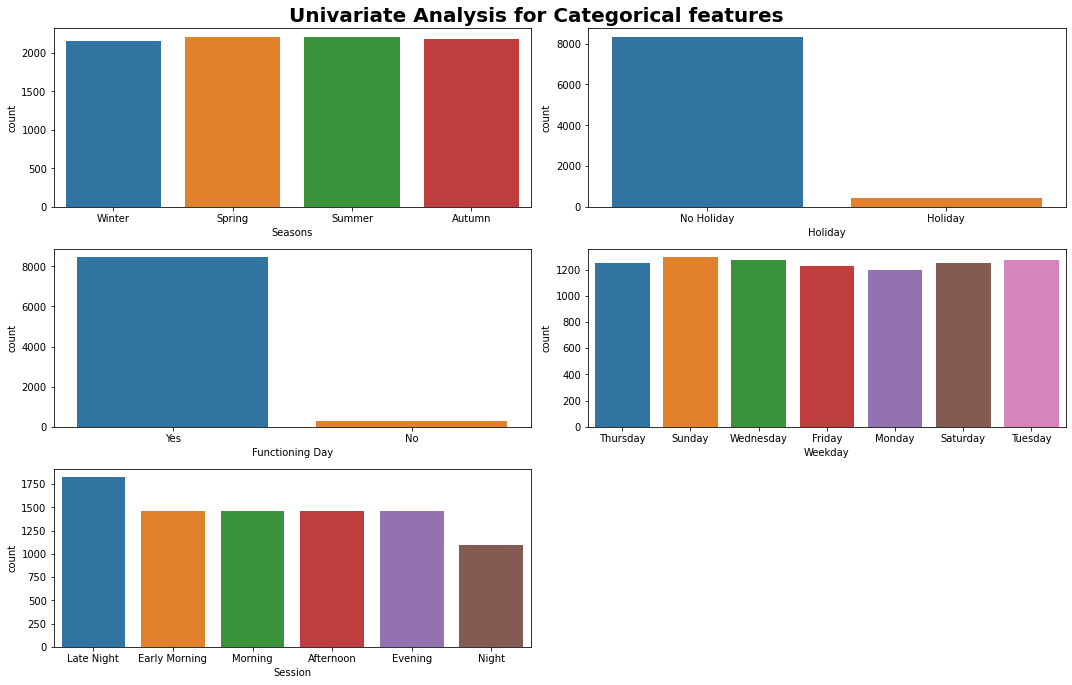

In [147]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis for Categorical features', fontsize=20, fontweight='bold', y=1.01)

for i in range(len(category_features)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[category_features[i]], data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

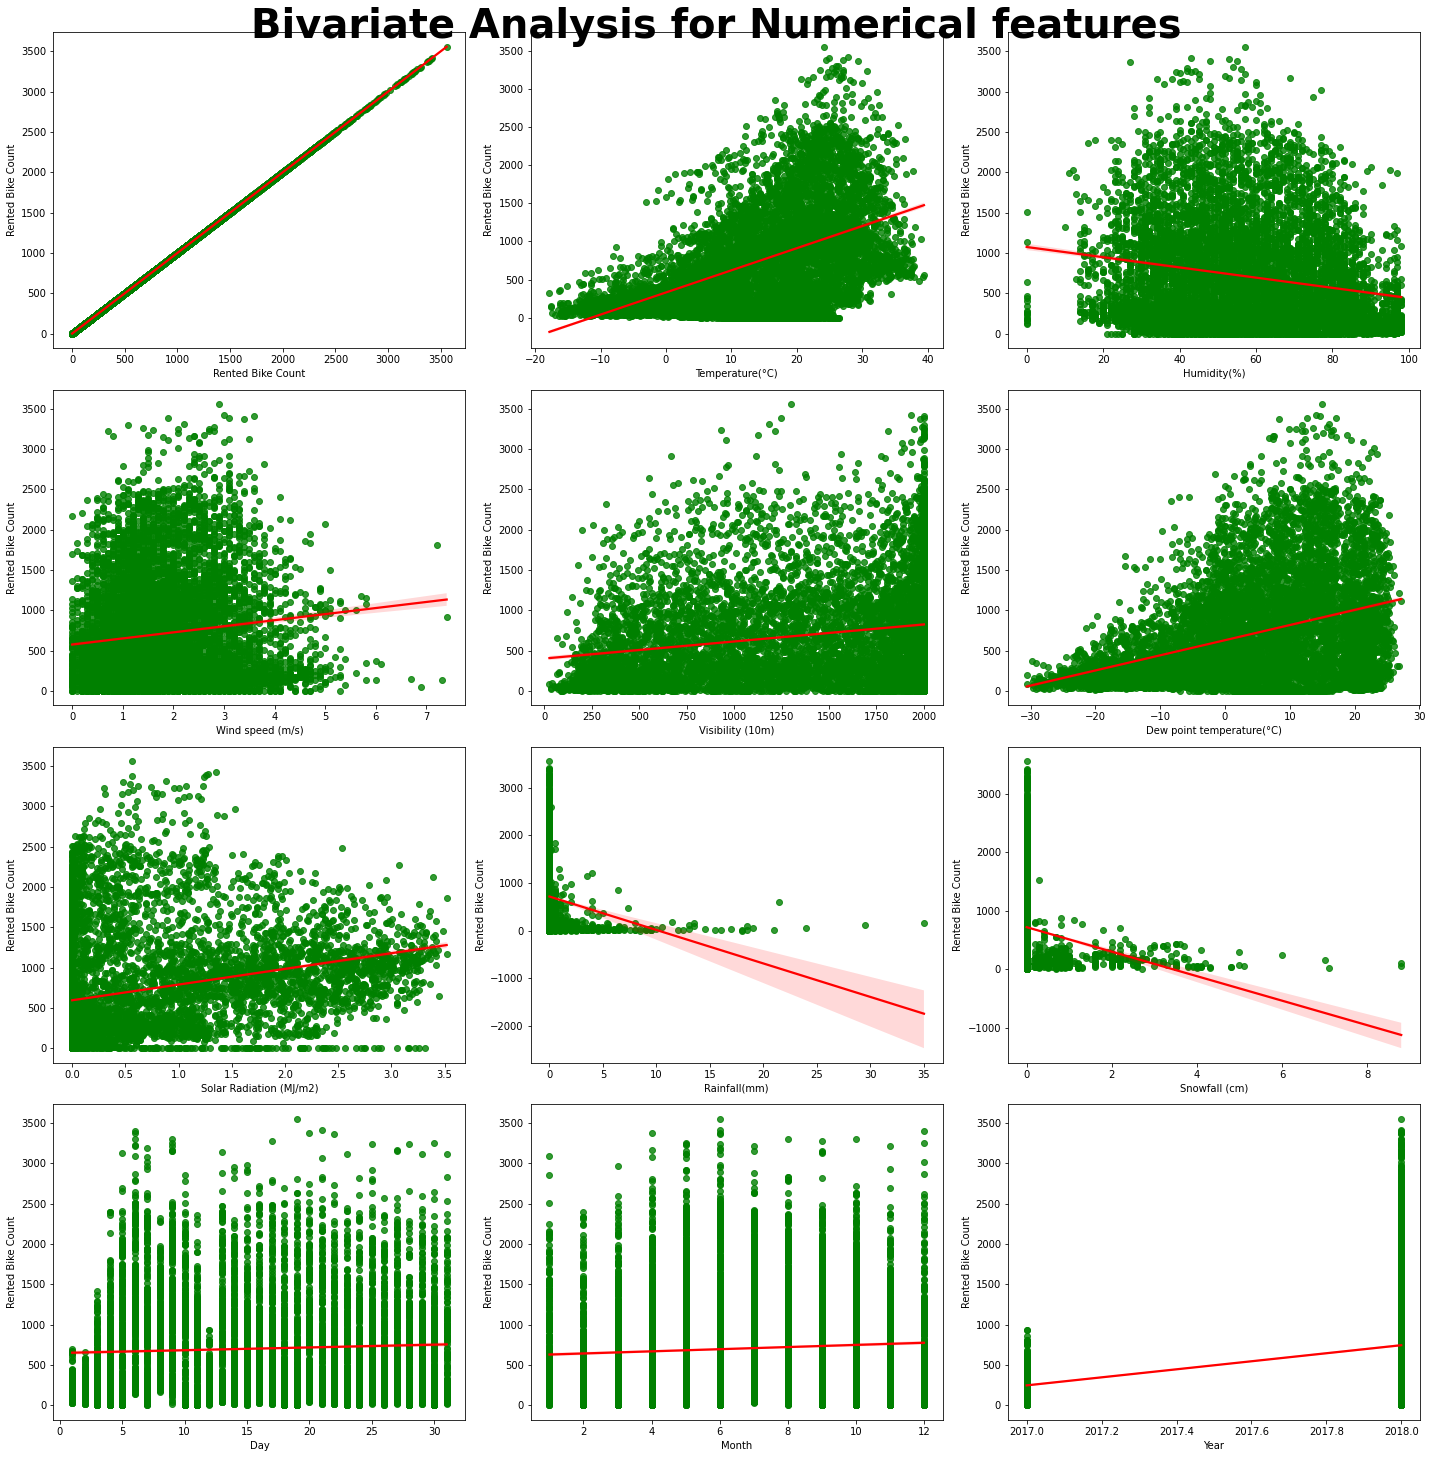

In [148]:
plt.figure(figsize=(20,20))
plt.suptitle('Bivariate Analysis for Numerical features', fontsize=40, fontweight='bold', y=1.01)

for i in range(len(numeric_features)):
    plt.subplot(4, 3, i+1)
    sns.regplot(x=df[numeric_features[i]], y=df['Rented Bike Count'], line_kws={'color':'red'}, scatter_kws={"color": 'green'})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

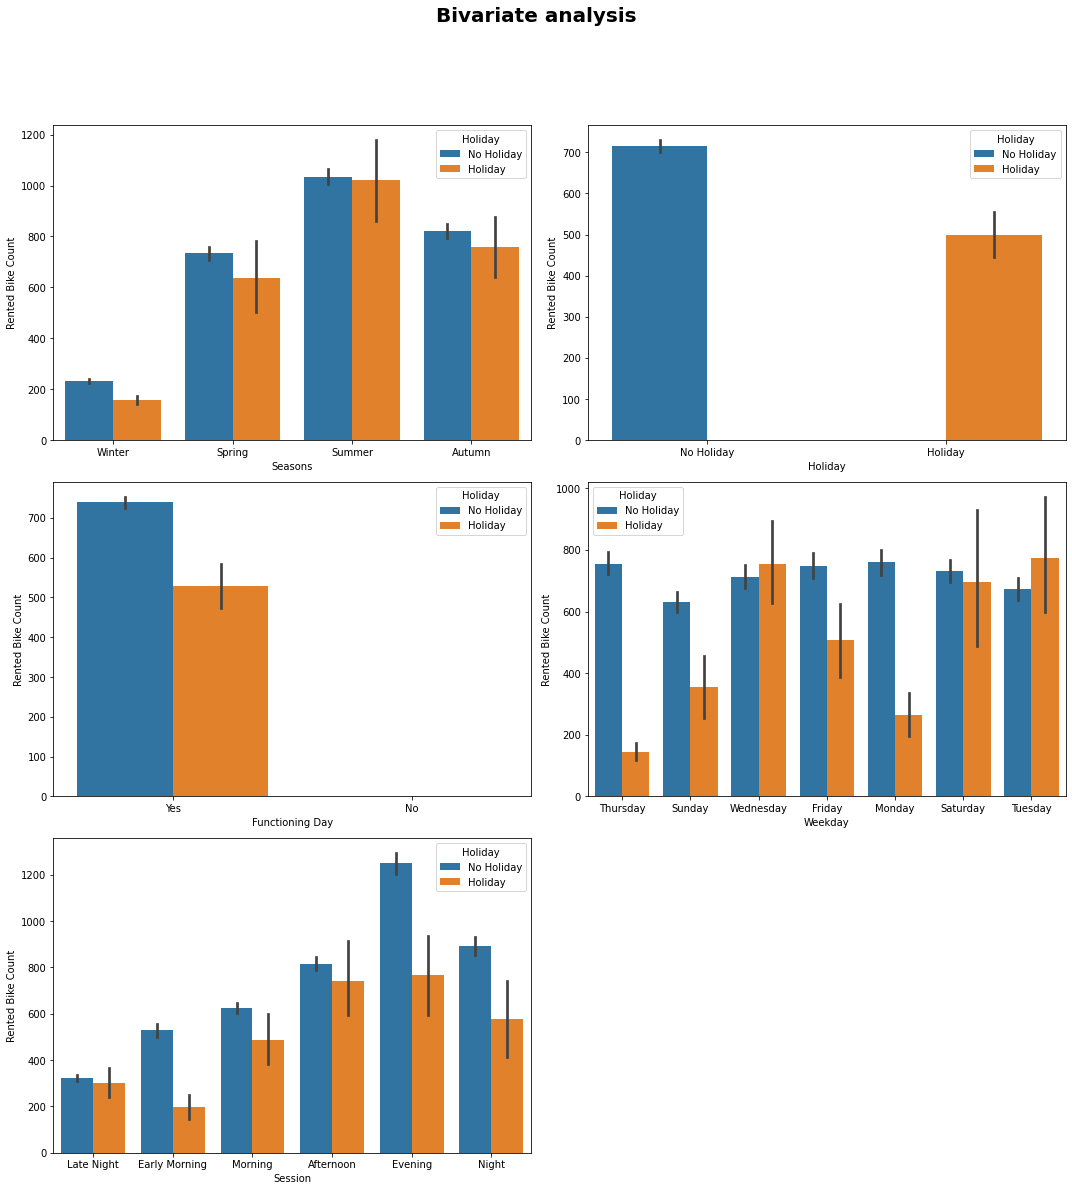

In [149]:
plt.figure(figsize=(15,15))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.1)

for i in range(len(category_features)):
    plt.subplot(3, 2, i+1)
    sns.barplot(x=df[category_features[i]], y=df['Rented Bike Count'], hue='Holiday', data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

In [150]:
df.nunique()

Rented Bike Count            2166
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Day                            31
Month                          12
Year                            2
Weekday                         7
Session                         6
dtype: int64

In [151]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [152]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

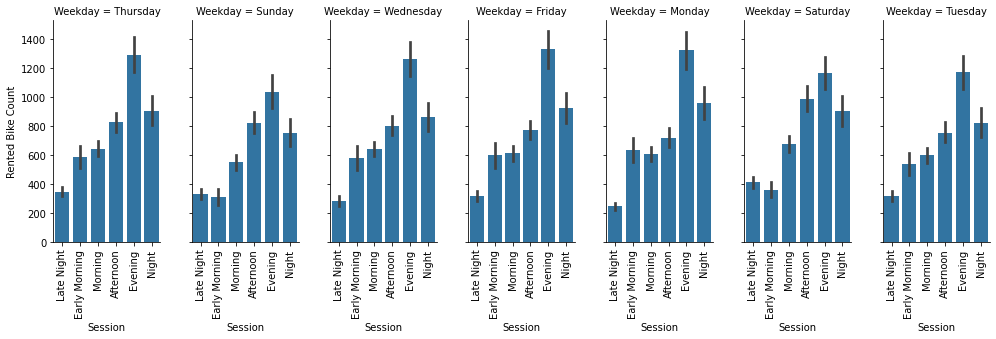

In [155]:
g = sns.FacetGrid(df, col="Weekday", height=4, aspect=.5)
g.map(sns.barplot, "Session", "Rented Bike Count")
g.set_xticklabels(rotation=90)

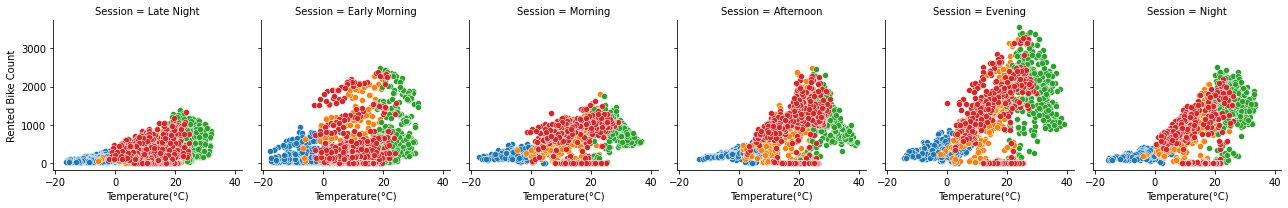

In [156]:
g = sns.FacetGrid(df, col="Session", hue='Seasons')
g.map(sns.scatterplot, "Temperature(°C)", "Rented Bike Count")

<Figure size 2880x2880 with 0 Axes>

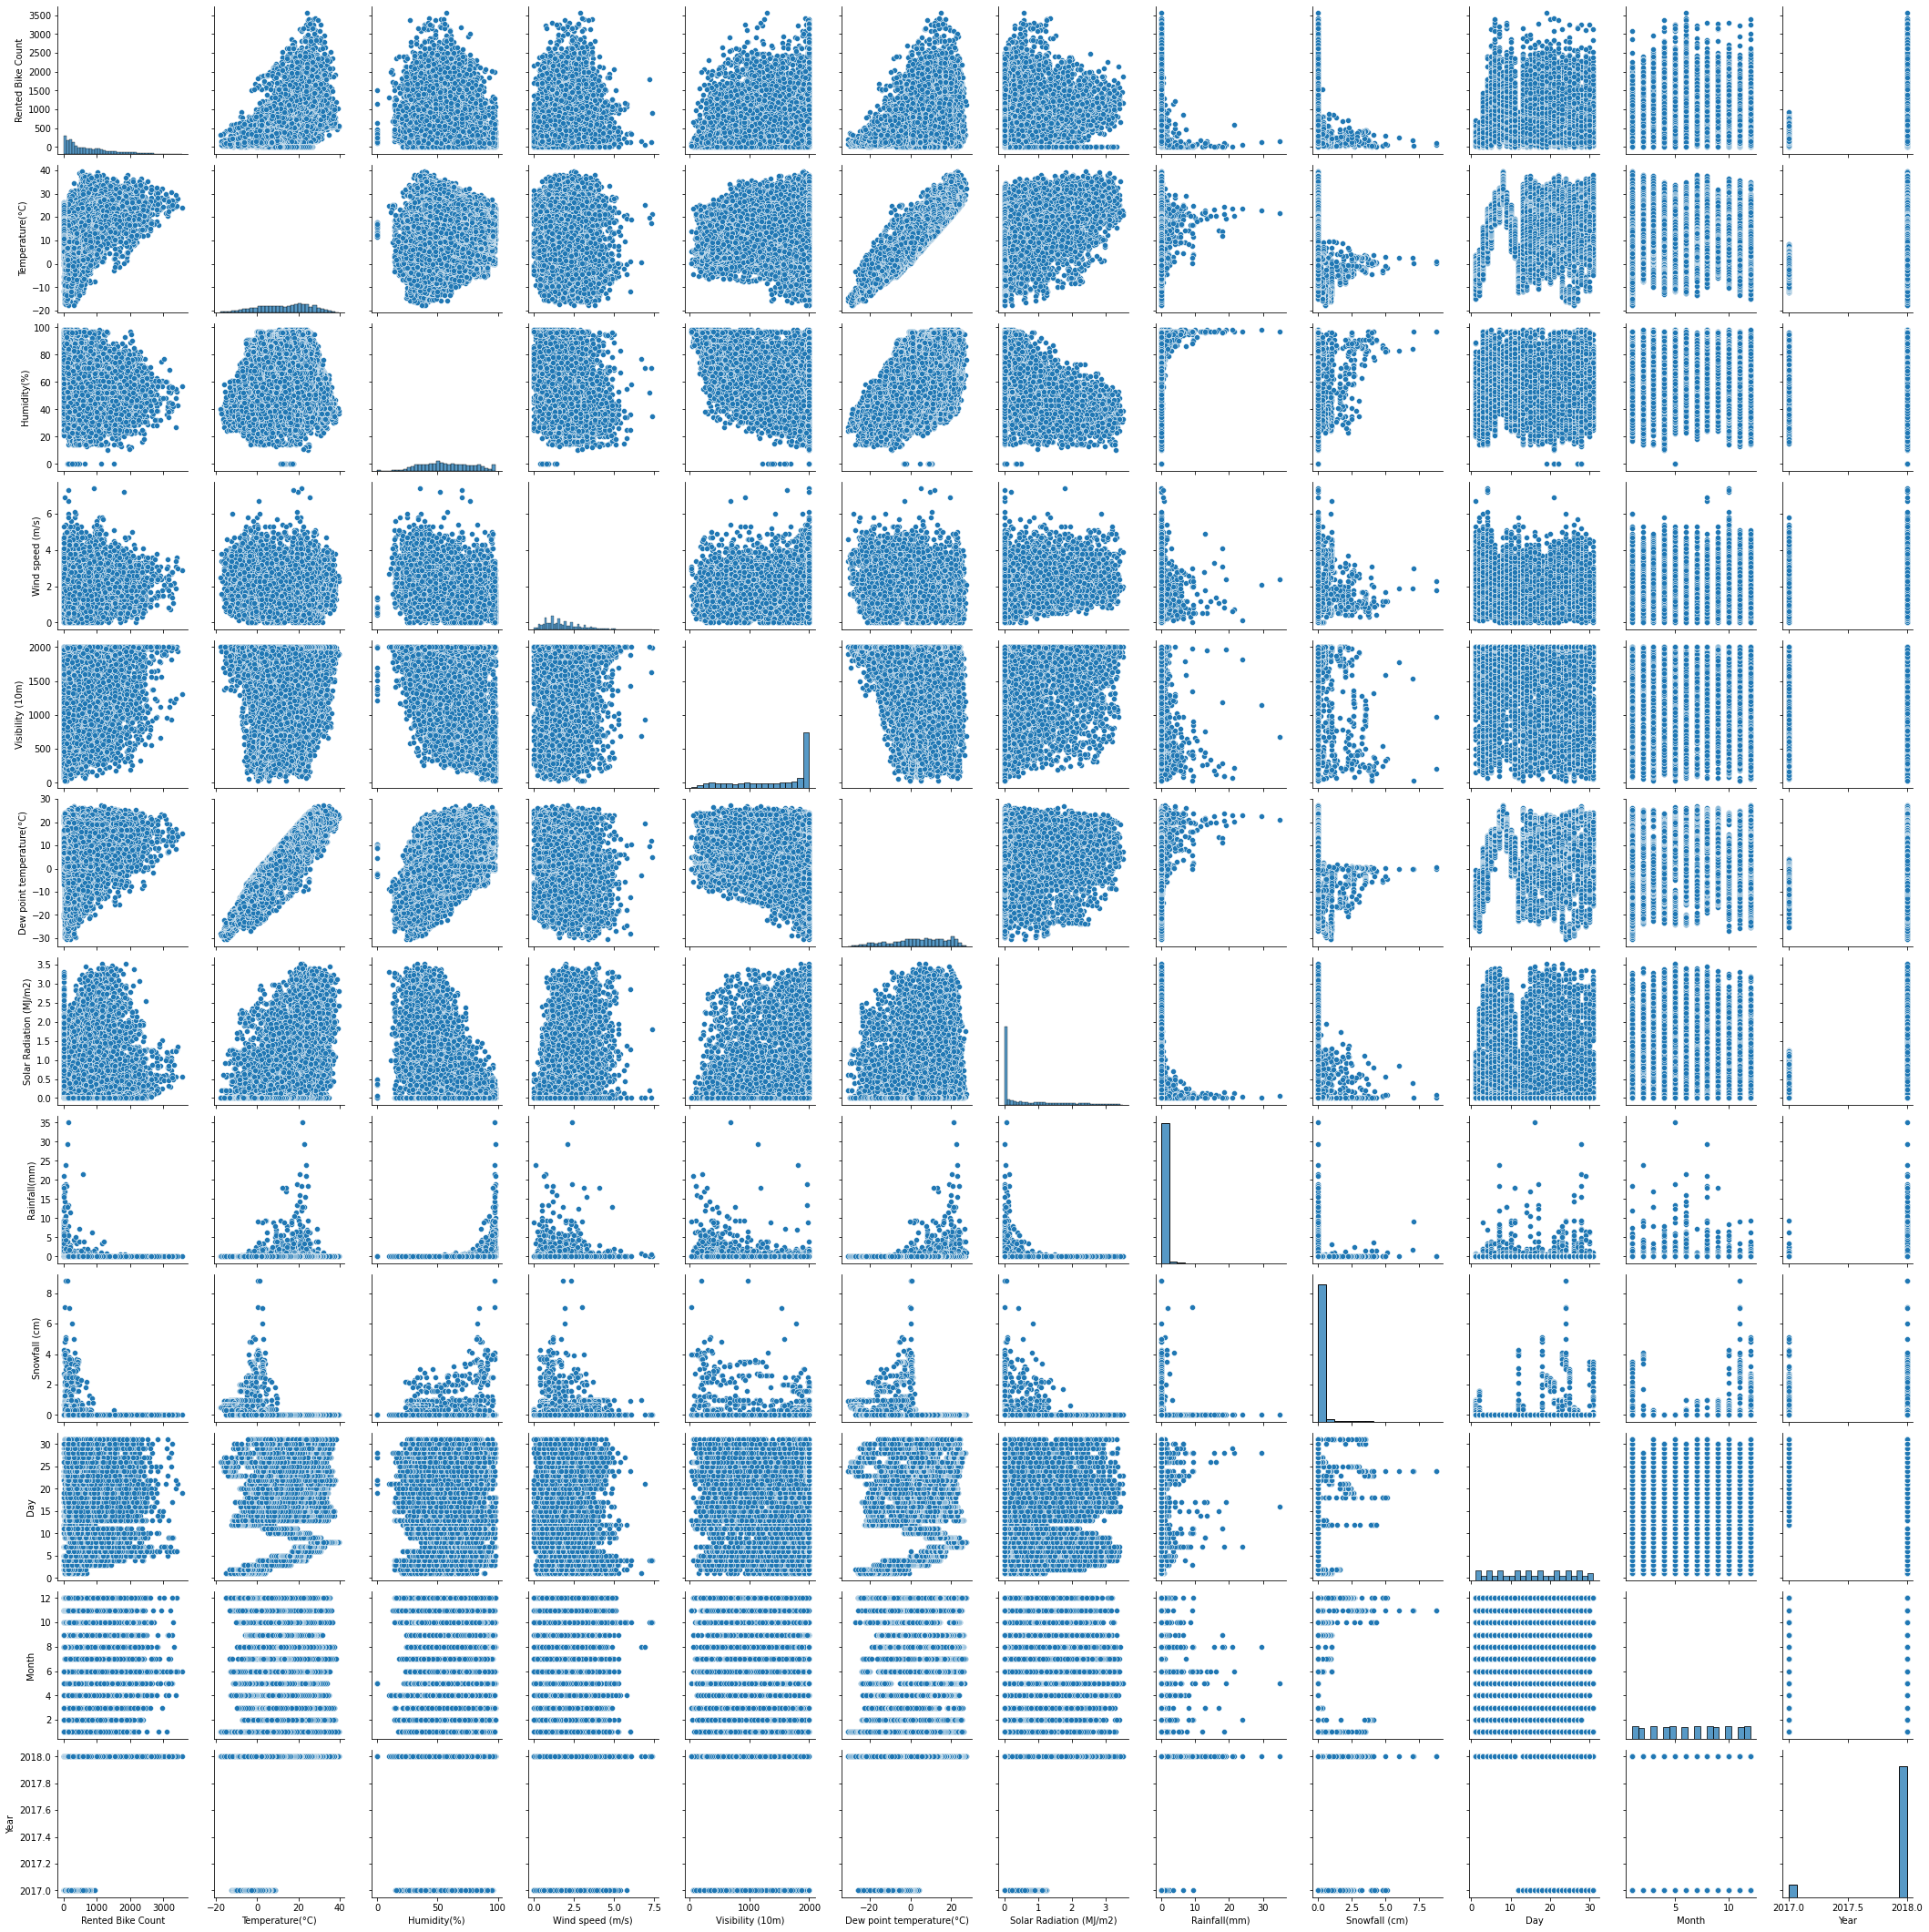

<Figure size 2880x2880 with 0 Axes>

In [157]:
sns.pairplot(df)
plt.figure(figsize=(40,40))

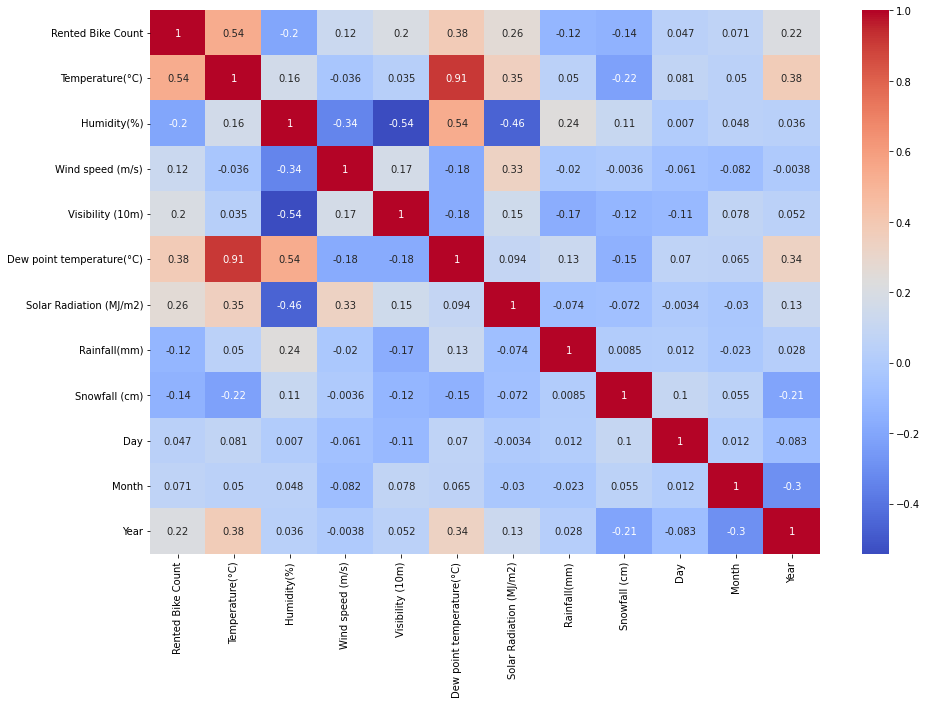

In [158]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  
  return vif

In [160]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Year', 'Dew point temperature(°C)']]])

VIF Factor                 features
0    3.176977          Temperature(°C)
1    6.738358              Humidity(%)
2    4.102661         Wind speed (m/s)
3    5.266960         Visibility (10m)
4    2.280205  Solar Radiation (MJ/m2)
5    1.080552             Rainfall(mm)
6    1.136123            Snowfall (cm)
7    3.808798                      Day
8    4.570536                    Month

In [161]:
df.describe().columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

In [172]:
numerical_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day', 'Month']

# **Encoding**

In [163]:
df.sample(4)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
4054               1221             14.2           73               1.9   
166                 389             -2.7           48               2.6   
8029                983             11.2           34               2.6   
7994                283              2.1           56               0.5   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
4054              2000                        9.4                     0.00   
166               1844                      -12.2                     0.00   
8029              1940                       -4.1                     2.26   
7994              2000                       -5.7                     0.00   

      Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day  \
4054           0.0            0.0  Spring  No Holiday             Yes   18   
166            0.0            0.0  Winter  No Holiday             Yes   12   
8029           0.0            0.0  Autumn  No Holiday             Yes   31   
7994           0.0            0.0  Autumn  No Holiday             Yes   30   

      Month  Year    Weekday     Session  
4054      5  2018     Friday       Night  
166       7  2017  Wednesday       Night  
8029     10  2018  Wednesday   Afternoon  
7994     10  2018    Tuesday  Late Night

In [164]:
df.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [165]:
# Ordinal Encoding
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1, 'No':0})
df['Holiday'] = df['Holiday'].map({'Holiday':1, 'No Holiday':0})

# A season is a period of the year that is distinguished by special climate conditions.
# The four seasons — Spring, Summer, Autumn, and Winter - follow one another regularly.
df['Seasons'] = df['Seasons'].map({'Spring':1, 'Summer':2, 'Autumn':3, 'Winter':4})

df['Weekday'] = df['Weekday'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

df['Session'] = df['Session'].map({'Early Morning':1, 'Morning':2, 'Afternoon':3, 'Evening':4, 'Night':5, 'Late Night':6})

In [166]:
df.Session.unique()

array([6, 1, 2, 3, 4, 5])

In [167]:
printinfo()

data_type  null_count  unique_count
Rented Bike Count             int64           0          2166
Temperature(°C)             float64           0           546
Humidity(%)                   int64           0            90
Wind speed (m/s)            float64           0            65
Visibility (10m)              int64           0          1789
Dew point temperature(°C)   float64           0           556
Solar Radiation (MJ/m2)     float64           0           345
Rainfall(mm)                float64           0            61
Snowfall (cm)               float64           0            51
Seasons                       int64           0             4
Holiday                       int64           0             2
Functioning Day               int64           0             2
Day                           int64           0            31
Month                         int64           0            12
Year                          int64           0             2
Weekday                       int64           0             7
Session                       int64           0             6

In [168]:
df

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254             -5.2           37               2.2   
1                   204             -5.5           38               0.8   
2                   173             -6.0           39               1.0   
3                   107             -6.2           40               0.9   
4                    78             -6.0           36               2.3   
...                 ...              ...          ...               ...   
8755               1003              4.2           34               2.6   
8756                764              3.4           37               2.3   
8757                694              2.6           39               0.3   
8758                712              2.1           41               1.0   
8759                584              1.9           43               1.3   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0                 2000                      -17.6                      0.0   
1                 2000                      -17.6                      0.0   
2                 2000                      -17.7                      0.0   
3                 2000                      -17.6                      0.0   
4                 2000                      -18.6                      0.0   
...                ...                        ...                      ...   
8755              1894                      -10.3                      0.0   
8756              2000                       -9.9                      0.0   
8757              1968                       -9.9                      0.0   
8758              1859                       -9.8                      0.0   
8759              1909                       -9.3                      0.0   

      Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  Day  \
0              0.0            0.0        4        0                1   12   
1              0.0            0.0        4        0                1   12   
2              0.0            0.0        4        0                1   12   
3              0.0            0.0        4        0                1   12   
4              0.0            0.0        4        0                1   12   
...            ...            ...      ...      ...              ...  ...   
8755           0.0            0.0        3        0                1   30   
8756           0.0            0.0        3        0                1   30   
8757           0.0            0.0        3        0                1   30   
8758           0.0            0.0        3        0                1   30   
8759           0.0            0.0        3        0                1   30   

      Month  Year  Weekday  Session  
0         1  2017        4        6  
1         1  2017        4        6  
2         1  2017        4        6  
3         1  2017        4        6  
4         1  2017        4        6  
...     ...   ...      ...      ...  
8755     11  2018        5        4  
8756     11  2018        5        4  
8757     11  2018        5        5  
8758     11  2018        5        5  
8759     11  2018        5        5  

[8760 rows x 17 columns]

In [170]:
category_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'Weekday', 'Session'], dtype='object')

In [174]:
features = numerical_features.copy()
features.extend(['Seasons', 'Holiday', 'Functioning Day', 'Weekday', 'Session'])
features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Weekday',
 'Session']

In [179]:
X = df[features]
y = df['Rented Bike Count']

In [187]:
# linear regression model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2000)

print(X_train.shape)
print(X_test.shape)

(7008, 14)
(1752, 14)


In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [183]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [184]:
reg.score(X_train, y_train)

0.45992431048564486

In [185]:
reg.score(X_test, y_test)

0.45970936261480055

In [190]:
y_pred = reg.predict(X_test)

In [193]:
from sklearn.metrics import mean_squared_error, r2_score

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.5894862851148432e+36
RMSE : 1.2607483036335378e+18
R2 : -2.6788290332646625e-06
Adjusted R2 :  -0.00806257376490338


In [ ]:
# Lasso ridge
